<a href="https://www.kaggle.com/code/jcarlossc/eda-acidentes-recife-2019?scriptVersionId=240918509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Análise Exploratória de Dados - EDA</h1>
<h3>Acidentes de trânsito em Recife no ano de 2019.</h3>
<p>Recife, 20 de Maio de 2025</p>

<h3>Apresentação</h3>
<p style='font-size:16px;'>Esta análise exploratória de dados (EDA) tem como objetivo examinar os registros de acidentes de trânsito ocorridos na cidade do Recife durante o ano de 2019. Através da exploração deste conjunto de dados, busca-se compreender padrões, identificar possíveis inconsistências e extrair insights que possam contribuir para a melhoria da segurança viária e para o planejamento de políticas públicas mais eficazes.</p>

<h3>Descrição do Dataset</h3>
<p style='font-size:16px;'>O conjunto de dados analisado contém informações detalhadas sobre os acidentes de trânsito registrados em Recife no ano de 2019. Cada registro representa um incidente e inclui variáveis como:</p>
<ul style='font-size:16px;'>
    <li>Data</li> 
    <li>Hora</li>
    <li>Tipo de acidente: colisão, atropelamento, capotamento, entre outros</li>
    <li>Localização: bairro, logradouro, entre outros</li>
    <li>Tipo de veículo</li>
</ul>

<p style='font-size:16px;'>
O dataset possui um total de 12062 registros e 42 variáveis, abrangendo tanto dados numéricos quanto categóricos.
As informações deste conjunto de dados são referentes aos acidentes de trânsito, com e sem vítimas, na cidade do Recife/Pernabuco em 2019. Endereço do dataset acidentes-2019.csv: <span style='color:orange;'>http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/3531bafe-d47d-415e-b154-a881081ac76c/download/acidentes-2019.csv</span></p>

<h3>Objetivos da Análise</h3>
<ul style='font-size:16px;'>
    <li>Compreender a distribuição temporal e espacial dos acidentes.</li>
    <li>Identificar os tipos de acidentes mais frequentes.</li>
    <li>Identificar os bairros com maior taxa de acidentes.</li>
    <li>Avaliar a gravidade dos acidentes em termos de vítimas.</li>
    <li>Identificar os tipo de veículos.</li>
    <li>Detectar possíveis padrões ou tendências que possam auxiliar na prevenção de futuros acidentes.</li>
</ul>

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Variável que contém o endereço do conjunto de dados
acidentes_file_path = '/kaggle/input/acidentes-2019/acidentes-2019.csv'
# Variável que lê o conjunto de dados através do método read_csv do Pandas
acidentes = pd.read_csv(acidentes_file_path)

In [3]:
# Apresenta as cinco primeiras linhas do conjunto de dados
acidentes.head(5)

,_id,DATA,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,1,2019-01-01T00:00:00,00:41:00,SEM VÍTIMA,FINALIZADA,IPSEP,AV RECIFE,NaN,NaN,LADO OPOSTO AO Nº 3257,...,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,Única,Faixa seccionada,NaN,NaN
1,2,2019-01-01T00:00:00,01:37:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,NaN,RUA MINISTRO NELSON HUNGRIA,NaN,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Não existe,NaN,NaN
2,3,2019-01-01T00:00:00,14:20:00,SEM VÍTIMA,CANCELADA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,NaN,RUA DOM JOSE LOPES,"EM FRENTE A DELEGACIA DE BOA VIAGEM, LADO ESQU...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-01-01T00:00:00,02:53:00,SEM VÍTIMA,CANCELADA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,100,RUA JACY,EM FRENTE A ART LED ILUMINAÇÃO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-01-01T00:00:00,08:17:00,COM VÍTIMA,FINALIZADA,JAQUEIRA,RUA TITO ROSAS,63,NaN,ED. JARDINS DA JAQUEIRA,...,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,Única,Faixa seccionada,NaN,NaN


In [4]:
# Informação sobre as colunas, números de linhas e metadados do conjunro de dadps 
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        12062 non-null  int64  
 1   DATA                       12062 non-null  object 
 2   hora                       12046 non-null  object 
 3   natureza_acidente          12058 non-null  object 
 4   situacao                   12058 non-null  object 
 5   bairro                     11914 non-null  object 
 6   endereco                   12009 non-null  object 
 7   numero                     6013 non-null   object 
 8   detalhe_endereco_acidente  4308 non-null   object 
 9   complemento                9609 non-null   object 
 10  endereco_cruzamento        12002 non-null  object 
 11  numero_cruzamento          6011 non-null   object 
 12  referencia_cruzamento      9606 non-null   object 
 13  bairro_cruzamento          11909 non-null  obj

<h3>Resumo das informações</h3>
<ul style='font-size:16px;'>
    <li>Quantidade de linhas : 12062</li>
    <li>Número de colunas : 42</li>
    <li>Uso estimado de memória : +3.9 MB</li>
    <li>Tipos de dados :
        <ul style='font-size:16px;'>
            <li>12 float64</li>
            <li>1 int64</li>
            <li>29 object</li>
        </ul> 
    </li>
</ul>

In [5]:
# Função que limpa as colunas categóricas
def limpar_coluna_categorica(dataset, coluna):
    """
    Remove valores nulos e vazios de uma coluna categórica.

    Parâmetros:
        dataset (pd.DataFrame): O DataFrame contendo a coluna
        coluna (str): O nome da coluna a ser verificada
    Retorna:
        dataset
    """
    print(f"Total de registros antes limpeza: {len(dataset)}")
    print(f"Valores nulos antes: {dataset[coluna].isna().sum()}")
    dataset = dataset[dataset[coluna].notna()]
    dataset[coluna] = dataset[coluna].astype(str).str.strip()
    dataset = dataset[dataset[coluna] != '']
    print(f"Total de registros após limpeza: {len(dataset)}")
    
    return dataset

In [6]:
# Função que limpa colunas DATA e HORA
def limpar_coluna_data_hora(dataset, coluna):
    """
    Converte a coluna de data para datetime e remove valores nulos ou inválidos.

    Parâmetros:
    - df: DataFrame
    - coluna: nome da coluna de data (str)
    - formato: string opcional com o formato da data (ex: '%d/%m/%Y')

    Retorna:
    - DataFrame com coluna convertida e linhas inválidas removidas
    """
    print(f"Nulos antes: {dataset[coluna].isna().sum()}")
    # Tenta converter para datetime
    dataset[coluna] = pd.to_datetime(dataset[coluna], errors='coerce')
    # Remove valores inválidos ou nulos
    dataset = dataset[dataset[coluna].notna()]
    print(f"Nulos depois da conversão: {dataset[coluna].isna().sum()}")
    return dataset

In [7]:
# Função que plota gráficos
def plotar_top_categorias(df, coluna, valor=10):
    """
    Plota gráfico de barras com as categorias mais frequentes.
    """
    valores = df[coluna].value_counts().head(valor).index
    df_filtrado = df[df[coluna].isin(valores)]

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df_filtrado, x=coluna, order=valores, palette="viridis")
    plt.title(f'Categorias da Coluna "{coluna}"')
    plt.xlabel(coluna.capitalize())
    plt.ylabel('Frequência')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

<h3>Coluna Bairro</h3>
<ul style='font-size:16px;'>
    <li>Chamada da função para limpeza dos dados</li>
    <li>Distribuição de Frequência dos Bairros</li>
    <li>Visualização com Gráfico de Barras (Top 20)</li>
</ul>    

In [8]:
# Limpar e carrega os dados da coluna BAIRRO
acidentes_bairro = limpar_coluna_categorica(acidentes, 'bairro')

Total de registros antes limpeza: 12062
Valores nulos antes: 148
Total de registros após limpeza: 11914


/tmp/ipykernel_13/482365313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[coluna] = dataset[coluna].astype(str).str.strip()


In [9]:
# Frequência dos acidentes por bairros
acidentes_bairro['bairro'].value_counts()

bairro
BOA VIAGEM            1522
IMBIRIBEIRA            730
SANTO AMARO            534
BOA VISTA              480
MADALENA               458
                      ... 
MORRO DA CONCEIÇÃO       8
BRASÍLIA TEIMOSA         8
CAÇOTE                   5
SÍTIO DOS PINTOS         4
BOMBA DO HEMETERIO       1
Name: count, Length: 94, dtype: int64

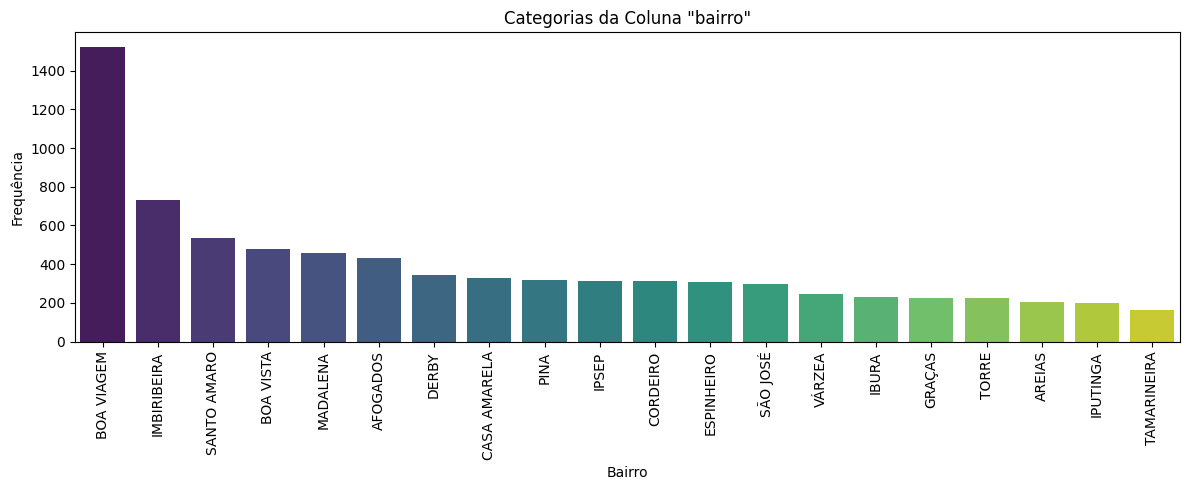

In [10]:
# Plota as informação por bairro
plotar_top_categorias(acidentes_bairro, 'bairro', valor=20)

<h3>Acidentes por bairro</h3>
<p style='font-size:16px;'>O gráfico mostra a distribuição dos registros por bairro, considerando os dados limpos e padronizados. Os bairros Boa Viagem, Imbiribeira e Santo Amaro concentram a maior quantidade de ocorrências, com destaque para Boa Viagem, que lidera com 1522 registros. Em contrapartida, bairros como Areias, Iputinga e Tamarineira aparecem com pouquíssimos registros, indicando baixa representatividade nos dados ou menor volume de ocorrências registrados nessas áreas.
Essa concentração pode refletir diferenças populacionais, econômicas ou operacionais na coleta de dados e pode ser útil para análises de cobertura, demanda por serviços ou alocação de recursos por região.</p>

<h3>Coluna Natureza dos acidentes</h3>
<ul style='font-size:16px;'>
    <li>Chamada da função para limpeza dos dados</li>
    <li>Distribuição de Frequência da Natereza dos acidentes</li>
    <li>Visualização com Gráfico de Barras (Top 20)</li>

In [11]:
# Limpa e carrega os dados da coluna NATUREZA DOS ACIDENTES
acidentes_natureza_acidentes = limpar_coluna_categorica(acidentes, 'natureza_acidente')

Total de registros antes limpeza: 12062
Valores nulos antes: 4
Total de registros após limpeza: 12058


/tmp/ipykernel_13/482365313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[coluna] = dataset[coluna].astype(str).str.strip()


In [12]:
# Frequências dos acidentes por natureza
acidentes_natureza_acidentes['natureza_acidente'].value_counts()

natureza_acidente
SEM VÍTIMA         9796
COM VÍTIMA         2235
VÍTIMA FATAL         25
ENTRADA E SAÍDA       1
APOIO                 1
Name: count, dtype: int64

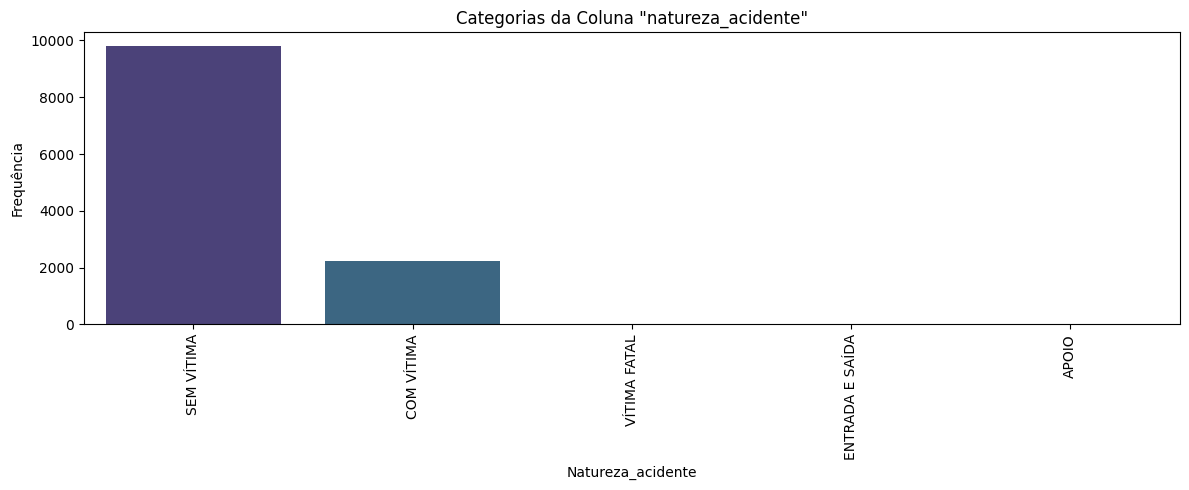

In [13]:
plotar_top_categorias(acidentes_natureza_acidentes, 'natureza_acidente', valor=20)

<h3>Natureza dos acidentes</h3>
<p style='font-size:16px;'>O gráfico de Naturea dos Acidentes mostra a distribuição dos tipos de acidentes registrados. A maioria dos casos corresponde a acidentes sem vítima, representando a grande maioria dos registros. Em seguida, vêm os acidentes com vítima, enquanto casos de vítima fatal são significativamente menos frequentes. Ocorrências como apoio ou entrada e saída são extremamente raras, podendo indicar registros específicos ou exceções operacionais.</p>

<h3>Coluna Tipo de Acidentes</h3>
<ul style='font-size:16px;'>
    <li>Chamada da função para limpeza dos dados</li>
    <li>Distribuição de Frequência dos tipos de Acidentes</li>
    <li>Visualização com Gráfico de Barras (Top 20)</li>

In [14]:
# Limpa e carrega os dados da coluna TIPO
acidentes_tipo = limpar_coluna_categorica(acidentes, 'tipo')

Total de registros antes limpeza: 12062
Valores nulos antes: 0
Total de registros após limpeza: 12062


In [15]:
# Frequências dos acidentes por tipo
acidentes_tipo['tipo'].value_counts()

tipo
ABALROAMENTO LONGITUDINAL    3871
COLISÃO TRASEIRA             2721
COLISÃO                      2240
ABALROAMENTO TRANSVERSAL     1777
CHOQUE VEÍCULO PARADO         392
ATROPELAMENTO                 250
COLISÃO FRONTAL               231
CHOQUE OBJETO FIXO            213
COLISÃO COM CICLISTA          199
TOMBAMENTO                     44
CHOQUE                         35
ACID. DE PERCURSO              32
ENGAVETAMENTO                  30
CAPOTAMENTO                    20
ATROPELAMENTO ANIMAL            6
SUBURBIO                        1
Name: count, dtype: int64

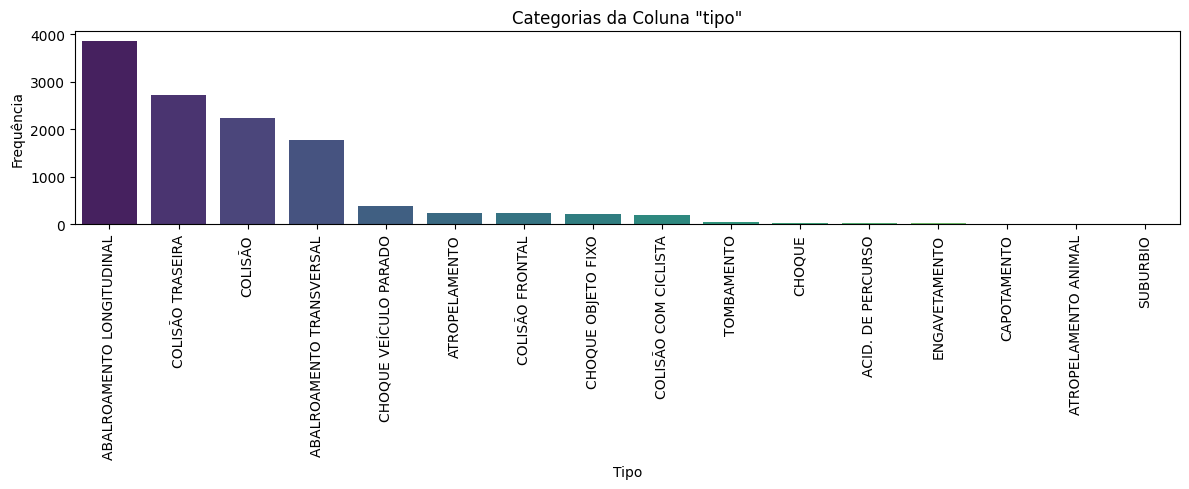

In [16]:
# Plota gráfico para coluna TIPO
plotar_top_categorias(acidentes_tipo, 'tipo', valor=20)

<h3>Acidentes por tipo</h3>
<p style='font-size:16px;'>
    O gráfico apresenta os 10 tipos de acidentes mais frequentes registrados no dataset. Os principais são:
</p>
<ul style='font-size:16px;'>
    <li>Abalroamento longitudinal (3871 ocorrências)</li>
    <li>Colisão traseira (2721)</li>
    <li>Colisão genérica (2240)</li>
    <li>Abalroamento transversal (1777)</li>
</ul>
<p style='font-size:16px;'>Esses tipos de acidente representam grande parte do total, indicando uma predominância de incidentes entre veículos em movimento, especialmente em fluxos paralelos e cruzamentos.
Eventos menos comuns, como capotamentos, atropelamento de animal ou subúrbio, aparecem em pequena quantidade, o que pode indicar situações excepcionais ou com menor risco coletivo.</p>

<h3>Coluna Data</h3>
<ul style='font-size:16px;'>
    <li>Chamada da função para conversão e limpeza dos dados</li>
    <li>Distribuição de Frequência da Data</li>
    <li>Visualização com Gráfico de Barras (Top 20)</li>
</ul>

In [17]:
# Limpa e carrega os dados da coluna DATA
acidentes_data_meses = limpar_coluna_data_hora(acidentes, 'DATA')

Nulos antes: 0
Nulos depois da conversão: 0


In [18]:
# Filtra os acidentes por meses
acidentes_data_meses['MÊS'] = acidentes_data_meses['DATA'].dt.month

In [19]:
# Ordena as informação dos acidentes por meses
acidentes_data_meses = acidentes_data_meses['MÊS'].value_counts().sort_index()

In [20]:
# Frequência dos acidentes por meses
acidentes_data_meses

MÊS
1      825
2      980
3     1033
4     1003
5      933
6      903
7      880
8      988
9     1013
10    1154
11    1146
12    1204
Name: count, dtype: int64

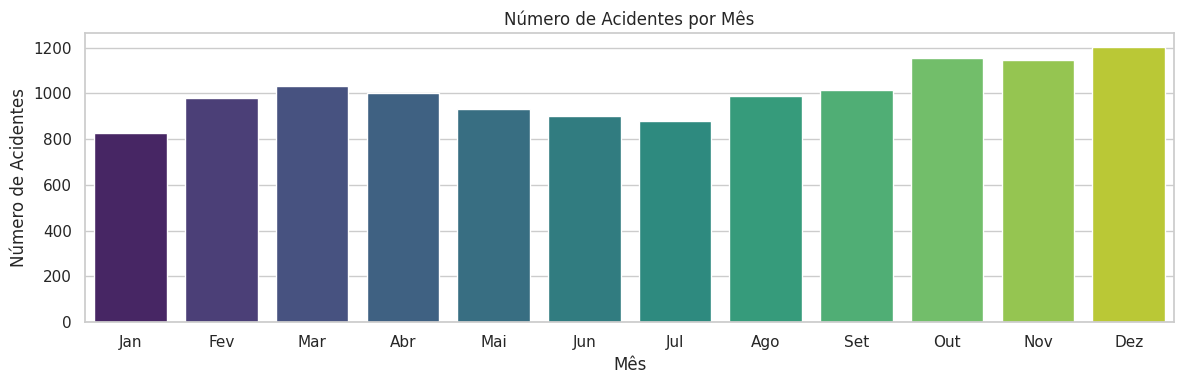

In [21]:
# Gráfico dos Acidentes por Mês
df_plot = acidentes_data_meses.reset_index()
df_plot.columns = ['Mês', 'Quantidade']

# Plotando com seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.barplot(x='Mês', y='Quantidade', data=df_plot, palette="viridis")

plt.title("Número de Acidentes por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Acidentes")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.tight_layout()
plt.show()

<h3>Acidentes por Mês</h3>
<p style='font-size:16px;'>O gráfico mostra a frequência total de ocorrências por mês durante o ano de 2019. É possível identificar períodos com maior concentração de registros, sugerindo uma possível sazonalidade nas ocorrências.
Por exemplo, os meses de novembro e dezembro apresentam picos mais altos, o que pode estar relacionado a maior movimentação urbana ou eventos sazonais. Já outros meses mantêm uma frequência mais estável.
Essa visualização permite uma análise mais clara das flutuações ao longo do tempo e pode auxiliar na identificação de padrões que sirvam de base para ações preventivas ou reforço de fiscalização em períodos críticos.</p>

In [22]:
# Limpa e carrega os dados da coluna DATA
acidentes_data_semana = limpar_coluna_data_hora(acidentes, 'DATA')

Nulos antes: 0
Nulos depois da conversão: 0


In [23]:
# Filtra os acidentes por dia da semana da coluna DATA
acidentes_data_semana['DIA_SEMANA'] = acidentes_data_semana['DATA'].dt.dayofweek

In [24]:
# Frequência de acidentes nos dias da semana
acidentes_data_semana['DIA_SEMANA'].value_counts()

DIA_SEMANA
4    2083
3    2016
1    1909
0    1878
2    1863
5    1341
6     972
Name: count, dtype: int64

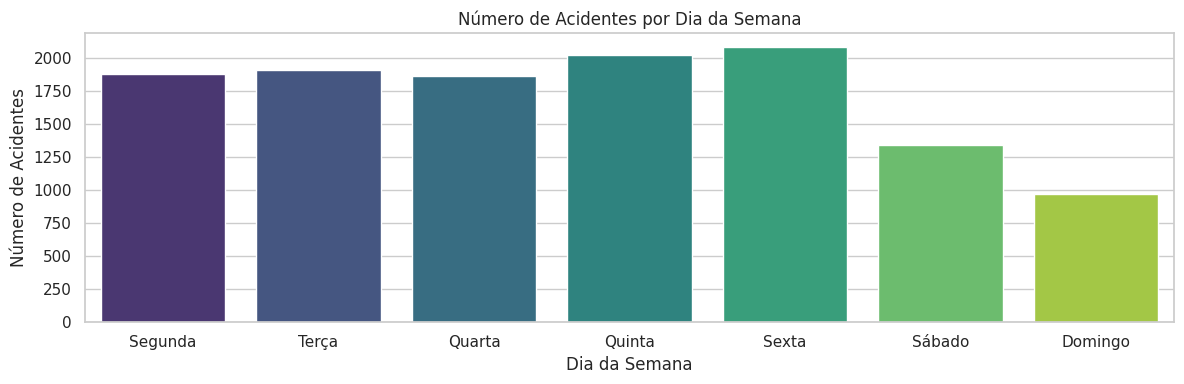

In [25]:
# Gráfico de acidentes por dia da semana
dias_semana = {
    0: 'Segunda',
    1: 'Terça',
    2: 'Quarta',
    3: 'Quinta',
    4: 'Sexta',
    5: 'Sábado',
    6: 'Domingo'
}

# Contagem de acidentes por dia da semana
acidentes_por_dia = acidentes_data_semana['DIA_SEMANA'].value_counts().sort_index()
df_plot = acidentes_por_dia.reset_index()
df_plot.columns = ['DiaSemana', 'Quantidade']
df_plot['DiaSemana'] = df_plot['DiaSemana'].map(dias_semana)

# Plotando com seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.barplot(x='DiaSemana', y='Quantidade', data=df_plot, palette="viridis")

plt.title("Número de Acidentes por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Acidentes")
plt.tight_layout()
plt.show()

<h3>Acidentes por dia da semana</h3>
<p style='font-size:16px;'>
    A distribuição dos acidentes ao longo da semana revela um padrão interessante. O dia com maior número de acidentes foi a sexta-feira (DIA_SEMANA = 4), com um total de 2.083 ocorrências, seguido de quinta-feira (3) com 2.016 e terça-feira (1) com 1.909 acidentes.
Os dias com menor número de acidentes foram o domingo (6), com 972 registros, e o sábado (5), com 1.341. Isso pode indicar uma redução no volume de tráfego durante os finais de semana, ou mudanças nos padrões de deslocamento das pessoas nesses dias.
De forma geral, observa-se uma concentração maior de acidentes nos dias úteis, especialmente entre terça e sexta-feira, o que pode estar associado ao maior fluxo de veículos em horários de trabalho e deslocamentos urbanos regulares.
</p>

<h3>Coluna Hora</h3>
<ul style='font-size:16px;'>
    <li>Chamada da função para conversão e limpeza dos dados</li>
    <li>Distribuição de Frequência da Data</li>
    <li>Visualização com Gráfico de Barras (Top 20)</li>
</ul>

In [26]:
# Limpa e carrega os dados da coluna HORA
acidentes_hora = limpar_coluna_data_hora(acidentes, 'hora')

Nulos antes: 16


/tmp/ipykernel_13/3670067504.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset[coluna] = pd.to_datetime(dataset[coluna], errors='coerce')


Nulos depois da conversão: 0


In [27]:
# Filtra as horas 
acidentes_por_hora = acidentes_hora['hora'].dt.hour

In [28]:
# Ordenação das horas do dia (0 a 23)
frequencia_por_hora = acidentes_por_hora.value_counts().sort_index()

In [29]:
# Frequência de acidentes por hora
frequencia_por_hora

hora
0     129
1      82
2      53
3      51
4      45
5      82
6     241
7     727
8     871
9     847
10    742
11    776
12    899
13    749
14    799
15    892
16    806
17    705
18    793
19    554
20    402
21    343
22    284
23    172
Name: count, dtype: int64

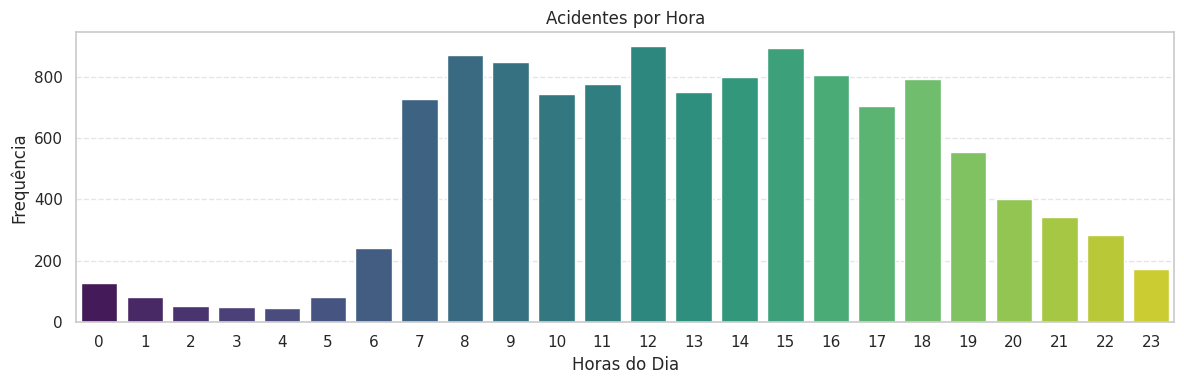

In [30]:
# # Gráfico de acidentes por hora

# Convertendo para DataFrame para usar com seaborn
df_plot = frequencia_por_hora.reset_index()
df_plot.columns = ['hora', 'frequencia']

# Plotando o gráfico
plt.figure(figsize=(12, 4))
sns.barplot(data=df_plot, x='hora', y='frequencia', palette="viridis")

plt.title('Acidentes por Hora')
plt.xlabel('Horas do Dia')
plt.ylabel('Frequência')
plt.xticks(range(24))  # Horas 0 a 23
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

<h3>Acidentes por horas do dia</h3>
<p style='font-size:16px;'>
    A distribuição da frequência de eventos ao longo das 24 horas do dia revela um padrão típico de atividade diária. As primeiras horas da madrugada (entre 0h e 5h) apresentam baixas frequências, com destaque para o horário das 4h, que registra o menor número de eventos (45).
A partir das 6h da manhã, observa-se um aumento significativo na atividade, atingindo um primeiro pico às 8h (871 eventos), que se mantém elevado até o meio da tarde. O horário de maior frequência é às 12h (899 eventos), seguido de perto pelos horários das 15h (892) e 14h (799).
Após as 17h, a frequência começa a diminuir gradativamente, mantendo-se ainda relativamente alta até as 18h (793), e depois caindo de forma mais acentuada. À noite, entre 20h e 23h, os valores continuam em queda, atingindo 172 eventos às 23h.
Esse padrão sugere que a maior parte das atividades ou registros ocorre durante o horário comercial e início da noite, com um claro declínio durante a madrugada.  
</p>

<h3>Colunas dos tipos de veículo envolvidos em acidentes</h3>
<ul style='font-size:16px;'>
    <li>Chamada da função para limpeza dos dados</li>
    <li>Contagem dos veículos</li>
    <li>Visualização com Gráfico de Barras (Top 20)</li>
</ul>

In [31]:
# Função para limpar e contar os tipos de veículos
def limpar_contar(dataset, coluna):
    '''
        Limpa e conta a quantidade de veículos.

        Parâmetros:
        - dataset: DataFrame
        - coluna: nome da coluna de data (str)
    
        Retorna:
        - DataFrame com linhas inválidas removidas e contadas
    '''
    dataset_limpo = limpar_coluna_data_hora(dataset, coluna)
    quantidade = len(dataset_limpo)
    print(f'Quantidade do tipo {coluna}: {quantidade}')
    return quantidade
    

In [32]:
# Limpa e carrega os dados e define variável com a quantidade do veículo da coluna AUTO
quantidade_auto = limpar_contar(acidentes, 'auto')

Nulos antes: 922
Nulos depois da conversão: 0
Quantidade do tipo auto: 11140


In [33]:
# Limpa e carrega os dados e define variável com a quantidade do veículo da coluna MOTO
quantidade_moto = limpar_contar(acidentes, 'moto')

Nulos antes: 9158
Nulos depois da conversão: 0
Quantidade do tipo moto: 2904


In [34]:
# Limpa e carrega os dados e define variável com a quantidade do veículo da coluna CICLISTA
quantidade_ciclista = limpar_contar(acidentes, 'ciclista')

Nulos antes: 11838
Nulos depois da conversão: 0
Quantidade do tipo ciclista: 224


In [35]:
# Limpa e carrega os dados e define variável com a quantidade de pedestre da coluna PEDESTRE
quantidade_pedestre = limpar_contar(acidentes, 'pedestre')


Nulos antes: 11807
Nulos depois da conversão: 0
Quantidade do tipo pedestre: 255


In [36]:
# Limpa e carrega os dados e define variável com a quantidade do veículo da coluna ÔNIBUS
quantidade_onibus = limpar_contar(acidentes, 'onibus')

Nulos antes: 10251
Nulos depois da conversão: 0
Quantidade do tipo onibus: 1811


In [37]:
# Limpa e carrega os dados e define variável com a quantidade do veículo da coluna CAMINHÃO
quantidade_caminhao = limpar_contar(acidentes, 'caminhao')

Nulos antes: 10838
Nulos depois da conversão: 0
Quantidade do tipo caminhao: 1224


In [38]:
# Limpa e carrega os dados e define variável com a quantidade do veículo da coluna VIATURA
quantidade_viatura = limpar_contar(acidentes, 'viatura')

Nulos antes: 11940
Nulos depois da conversão: 0
Quantidade do tipo viatura: 122


In [39]:
# Limpa e carrega os dados e define variável com a quantidade do veículo da coluna OUTROS
quantidade_outros = limpar_contar(acidentes, 'outros')

Nulos antes: 11852
Nulos depois da conversão: 0
Quantidade do tipo outros: 210


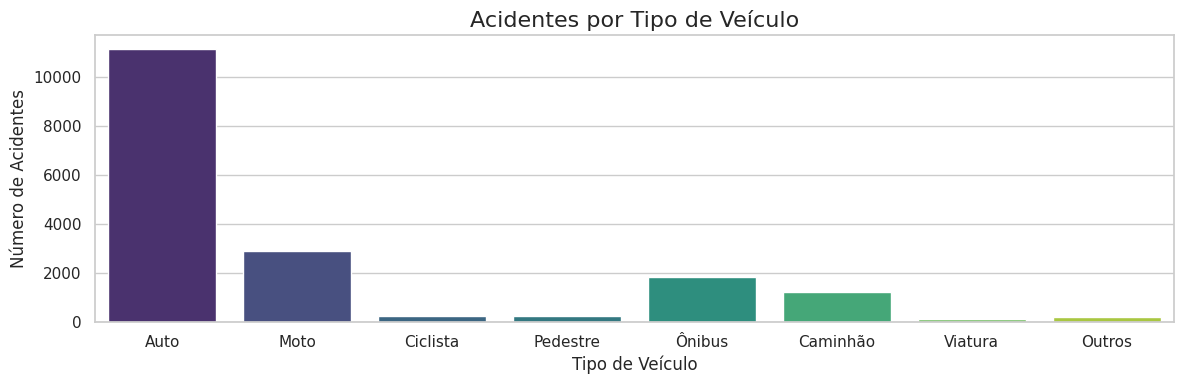

In [40]:
# Gráfico de acidentes por tipo deveículo

# Dados dos tipos de veículos
dados = {
    'modal': ['Auto', 'Moto', 'Ciclista', 'Pedestre', 'Ônibus', 'Caminhão', 'Viatura', 'Outros'],
    'quantidade': [quantidade_auto, quantidade_moto, quantidade_ciclista, quantidade_pedestre, quantidade_onibus, quantidade_caminhao, quantidade_viatura, quantidade_outros]
}

tipo_veiculo = pd.DataFrame(dados)

# Define o estilo e o tamanho do gráfico
plt.figure(figsize=(12, 4))
sns.set_style("whitegrid")

# Gráfico de barra
sns.barplot(data=tipo_veiculo, x='modal', y='quantidade', palette='viridis')

# Personalização
plt.title('Acidentes por Tipo de Veículo', fontsize=16)
plt.xlabel('Tipo de Veículo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.tight_layout()

<p style='font-size:16px;'>
    A distribuição dos acidentes de trânsito por tipo de veículo revela que os automóveis (carros) representam a maioria absoluta das ocorrências, com 11.140 registros. Esse número expressivo reflete a predominância desse tipo de veículo na frota urbana e seu uso cotidiano em deslocamentos.
Em seguida, destacam-se as motocicletas, com 2.904 ocorrências, evidenciando seu papel significativo tanto na mobilidade urbana quanto na vulnerabilidade dos motociclistas no trânsito.
Entre os tipos coletivos e de carga, os ônibus aparecem com 1.811 registros e os caminhões com 1.224, indicando que esses veículos pesados também estão frequentemente envolvidos em acidentes, possivelmente devido à sua presença em vias arteriais e ao porte dos veículos.
Os pedestres e ciclistas representam um total menor de ocorrências — 255 e 224, respectivamente — mas merecem atenção especial por se tratarem de usuários mais vulneráveis no sistema viário, em que qualquer colisão tende a ter consequências mais graves.
As viaturas (122 registros) e a categoria “outros” (210) correspondem a uma fração reduzida do total, podendo incluir veículos oficiais, especiais ou com menor representatividade na frota.
</p>

<h2>Relatório de Análise de Acidentes de Trânsito</h2>

<p style='font-size:16px;'>
    Os dados analisados indicam que os acidentes de trânsito concentram-se nos bairros de maior circulação, em dias úteis e nos horários de pico, refletindo o impacto direto do volume de tráfego. Automóveis e motocicletas estão envolvidos na maioria das ocorrências, enquanto pedestres e ciclistas, embora em menor número, representam grupos vulneráveis e exigem atenção especial. A maioria dos acidentes não resulta em vítimas fatais, mas a presença de casos com lesões e fatalidades reforça a necessidade de políticas públicas focadas em prevenção, reforço na sinalização, fiscalização e segurança viária.
</p>